Z-Scores

In statistics, a z-score tells us how many standard deviations away a value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

where:

X is a single raw data value
μ is the population mean
σ is the population standard deviation

We can calculate z-scores in Python using scipy.stats.zscore

In [1]:
#Import modules
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
#Create an array of values
data = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

In [3]:
#Calculate the z-scores for each value in the array
stats.zscore(data)

array([-1.39443338, -1.19522861, -1.19522861, -0.19920477,  0.        ,
        0.        ,  0.39840954,  0.5976143 ,  1.19522861,  1.79284291])

For example:

The first value of “6” in the array is 1.394 standard deviations below the mean.
The fifth value of “13” in the array is 0 standard deviations away from the mean, i.e. it is equal to the mean.
The last value of “22” in the array is 1.793 standard deviations above the mean.
#Each z-score tells us how many standard deviations away an individual value is from the mean. 

In [4]:
data.mean()

13.0

In [5]:
# Is Frank better in English than in math? 
#First, we load our packages and create a data frame with the test results.
import pandas as pd
import numpy as np
import scipy.stats as stats
test_scores = pd.DataFrame({"math":[48, 33, 41],
     "english":[82, 98, 75]},
    index=[1, 2, 3])
test_scores
#But we can test our question with the z-score by normalizing and comparing the means.

,math,english
1,48,82
2,33,98
3,41,75


In [6]:
#To calculate the z-scores in pandas we just apply the formula to our data.
z_test_scores = (test_scores-test_scores.mean())/(test_scores.std())
z_test_scores
#In pandas the default setting is the normalization by N-1 for the calculation of the standard deviation.

,math,english
1,0.977054,-0.254457
2,-1.021466,1.102646
3,0.044412,-0.848189


In [7]:
stats.zscore(test_scores)
#In numpy the default setting is the normalization by N for the calculation of the standard deviation.

,math,english
1,1.196642,-0.311645
2,-1.251035,1.350460
3,0.054393,-1.038815


In [8]:
#If we adapt the delta degrees of freedom to N-1 equal to pandas, we receive the same results as above.
stats.zscore(test_scores, ddof=1)

,math,english
1,0.977054,-0.254457
2,-1.021466,1.102646
3,0.044412,-0.848189


In [9]:
#To answer the question (in what subject Frank is better this term?) we use the mean of the scores and pass it into the same function.
stats.zscore(test_scores.mean())

math      -1.0
english    1.0
dtype: float64

In [10]:
#This tells us that Frank was better in English than in math!

Chi-Square Test

The chi-squared test checks the difference between the observed value and the expected value. Chi-Square shows or in a way check the relationship between two categorical variables which can be can be calculated by using the given observed frequency and expected frequency. 

Chi Square Formula : 
χ2 = ∑(Oi – Ei)2/Ei
where

Oi = observed value (actual value)
Ei = expected value.

In [11]:
#Import modules 
import numpy as np
import pandas as pd
#Read the file and print the dataframe
SmokeData = pd.read_excel("C:/Users/sai/Downloads/SmokeData.xlsx")
SmokeData

,ID,gender,SMOKE
0,1,M,Y
1,2,F,N
2,3,M,Y
3,4,F,N
4,5,F,Y
5,6,F,N
6,7,M,Y
7,8,M,N
8,9,F,Y
9,10,M,N


In [12]:
#The Contingency Table 
Smoke_table = pd.crosstab(index=SmokeData["gender"],columns=SmokeData["SMOKE"])
Smoke_table

SMOKE,N,Y
gender,,
F,5,4
M,3,6


The aim of the test is to conclude whether the two variables( gender and choice of SMOKE ) are related to each other.If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then H0 holds true. we will calculate the p-value and critical value which will help to accept or reject the null hypothesis.

In [13]:
#Import modules 
import scipy.integrate
import scipy.special

chi2, p, ddof, expected = scipy.stats.chi2_contingency(Smoke_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 0.22499999999999998
p-value: 0.6352562959972484
Degrees of Freedom: 1

[[4. 5.]
 [4. 5.]]


The p-value comes out to be 0.6352562959972484 and as the p-value is greater than 0.05 therefore, we accept the null hypothesis i.e. these two variables are correlated with each other.The chi-square statistic is 0.9. Test Statistic: 0.22499999999999998 (Yate’s Correction). 

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

t = ( x̄ – μ) / (s / √n)
where

x̄ = Observed Mean of the Sample
μ = Theoretical Mean of the Population
s = Standard Deviation of the Sample
n = Sample Size

In [14]:
#One-sample T-test
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [15]:
len(ages)

32

In [16]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [17]:
# Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [18]:
age_sample

array([28, 28, 43, 70, 25, 28, 70, 50, 27, 18])

In [19]:
from scipy.stats import ttest_1samp

In [20]:
ttest,p_value=ttest_1samp(age_sample,30)

In [21]:
print(p_value)

0.17868495157892988


In [22]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [23]:
#Paired T-test With Python
#When you want to check how different samples from the same group are, you can go for a paired T-test
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [24]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[22.31654336 22.15436755 28.1963332  30.08294925 20.58422565 35.72594577
 24.83643366 26.29780711 31.8839698  21.86959161 31.71504523 23.78283972
 24.54427724 24.25877808 49.8038247 ]


In [25]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [26]:
weight_df

,weight_10,weight_20,weight_change
0,25,22.316543,-2.683457
1,30,22.154368,-7.845632
2,28,28.196333,0.196333
3,35,30.082949,-4.917051
4,28,20.584226,-7.415774
5,34,35.725946,1.725946
6,26,24.836434,-1.163566
7,29,26.297807,-2.702193
8,30,31.883970,1.883970
9,26,21.869592,-4.130408


In [27]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [28]:
print(p_value)

0.03448722559587049


In [29]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


An F-test is used to test whether two population variances are equal.

The null and alternative hypotheses for the test are as follows:
H0: σ12 = σ22 (the population variances are equal)
H1: σ12 ≠ σ22 (the population variances are not equal)

In [30]:
#Suppose we have the following two samples:
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]

In [31]:
import numpy as np
from scipy.stats import f

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [32]:
f_test(x, y)

(4.387122002085505, 0.01912653593238578)

#The F test statistic is 4.38712 and the corresponding p-value is 0.019127. Since this p-value is less than .05, we would reject the null hypothesis. This means we have sufficient evidence to say that the two population variances are not equal.

The binomial distribution model deals with finding the probability of success of an event which has only two possible outcomes in a series of experiments.

Binomial Distribution Formula
P(x) = nCx · px (1 − p)n−x

Where,

n = Total number of events
r (or) x = Total number of successful events.
p = Probability of success on a single trial.
nCr = [n!/r!(n−r)]!
1 – p = Probability of failure.

In [33]:
from scipy import stats

def binomial():
    '''
    output: ans : Float
    '''
    #Write your code here
    #Assign the probability value to the variable ans
    #Round off to 2 decimal places
    n = 4
    r = list(range(1,n+1))
    p = float(60/100)
    
    
    ans = stats.binom.pmf(r,n,p)
    
    return round(float(sum(ans)),2)

if __name__=='__main__':
	print(binomial())

0.97


Syntax:

The binom.pmf method has the following syntax:
>>>scipy.stats.binom.pmf(r,n, p)

Parameters:

The binom.pmf function takes in three parameters:
n: the total number of trials or times the experiment will be carried out.
r: a list of integers from 0 to n, inclusive.
p: the probability that the outcome of a single experiment will be a success. The value of p must be between 0 and 1, inclusive.

In [34]:
#Import modules 
from numpy import random

x = random.binomial(n=10, p=0.5, size=10)
print(x)

[4 5 3 7 7 5 6 4 5 4]


C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


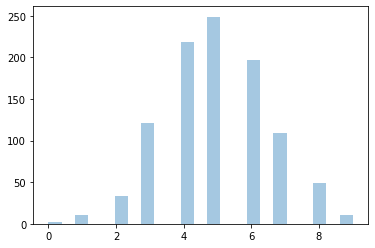

In [35]:
#Visualization of Binomial Distribution
#Import modules 
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)
plt.show()

C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


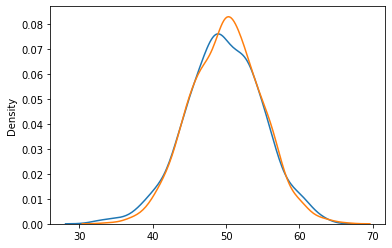

In [36]:
#Difference Between Normal and Binomial Distribution
#Import modules 
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

plt.show()

C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

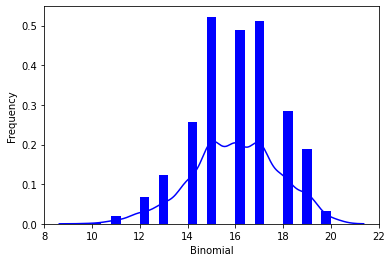

In [37]:
#Import modules 
from scipy.stats import binom
import seaborn as sb

binom.rvs(size=10,n=20,p=0.8)

data_binom = binom.rvs(n=20,p=0.8,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

A/B testing

A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.

In [38]:
import numpy as np 
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
df = pd.read_csv("C:/Users/sai/Downloads/grocerywebsiteabtestdata.csv")
df.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0


In [40]:
df.shape

(184588, 5)

An IP Address may have visited the page more than once. So that this doesn't affect the results, I reduce the Visit value to 1 for users with multiple visits

In [41]:
df = df.groupby(["IP Address", "LoggedInFlag", "ServerID"])["VisitPageFlag"].sum()
df

IP Address  LoggedInFlag  ServerID
0.0.108.2   0             1           0
0.0.109.6   1             1           0
0.0.111.8   0             3           0
0.0.160.9   1             2           0
0.0.163.1   0             2           0
                                     ..
99.9.53.7   1             2           0
99.9.65.2   0             2           0
99.9.79.6   1             2           0
99.9.86.3   0             1           1
99.9.86.9   0             1           0
Name: VisitPageFlag, Length: 99763, dtype: int64

In [42]:
df = df.reset_index(name="VisitPageFlagSum")
df.head()

,IP Address,LoggedInFlag,ServerID,VisitPageFlagSum
0,0.0.108.2,0,1,0
1,0.0.109.6,1,1,0
2,0.0.111.8,0,3,0
3,0.0.160.9,1,2,0
4,0.0.163.1,0,2,0


In [43]:
df["VisitPageFlag"] = df["VisitPageFlagSum"].apply(lambda x: 1 if x != 0 else 0)
df.head()

,IP Address,LoggedInFlag,ServerID,VisitPageFlagSum,VisitPageFlag
0,0.0.108.2,0,1,0,0
1,0.0.109.6,1,1,0,0
2,0.0.111.8,0,3,0,0
3,0.0.160.9,1,2,0,0
4,0.0.163.1,0,2,0,0


Then I need to split the dataset into Test and Control groups. I will perform this operation with the help of ServerID. I set ServerID 1 as Test group and ServerID 2 and 3 as Control group.

In [44]:
df['group'] = df['ServerID'].map({1:'Test', 2:'Control', 3:'Control'})
df.drop(['ServerID','VisitPageFlagSum'],axis=1, inplace=True)

In [45]:
df.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.108.2,0,0,Test
1,0.0.109.6,1,0,Test
2,0.0.111.8,0,0,Control
3,0.0.160.9,1,0,Control
4,0.0.163.1,0,0,Control


In [46]:
df_control = df[df['group'] == 'Control'].copy()
df_control.reset_index(inplace=True, drop = True)

In [47]:
df_test = df[df['group'] == 'Test'].copy()
df_test.reset_index(inplace=True, drop = True)

In [48]:
df_control.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.111.8,0,0,Control
1,0.0.160.9,1,0,Control
2,0.0.163.1,0,0,Control
3,0.0.178.9,1,0,Control
4,0.0.185.4,1,0,Control


In [49]:
df_test.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.108.2,0,0,Test
1,0.0.109.6,1,0,Test
2,0.0.169.1,1,0,Test
3,0.0.181.9,0,1,Test
4,0.0.195.5,1,0,Test


In [50]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
LoggedInFlag,66460.0,0.503912,0.499988,0.0,0.0,1.0,1.0,1.0
VisitPageFlag,66460.0,0.092251,0.289382,0.0,0.0,0.0,0.0,1.0


In [51]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
LoggedInFlag,33303.0,0.503258,0.499997,0.0,0.0,1.0,1.0,1.0
VisitPageFlag,33303.0,0.115515,0.319647,0.0,0.0,0.0,0.0,1.0


In the control data set, let's calculate the ratio of those who enter the page we want, compared to all those who enter the site.

In [52]:
control_sum_visit = df_control['VisitPageFlag'].count()
print("Sum visit for control group: ", control_sum_visit)
control_visit_1 = df_control[df_control['VisitPageFlag'] ==1]['VisitPageFlag'].count()
print("Visit Page target = 1 : ", control_visit_1)

Sum visit for control group:  66460
Visit Page target = 1 :  6131


In [53]:
control_ratio_visit = control_visit_1/control_sum_visit
control_ratio_visit

0.09225097803189888

We calculate the same ratio within the Test group.

In [54]:
test_sum_visit = df_test['VisitPageFlag'].count()
print("Sum visit for test group: ", test_sum_visit)
test_visit_1 = df_test[df_test['VisitPageFlag'] ==1]['VisitPageFlag'].count()
print("Visit Page target = 1 : ", test_visit_1)

Sum visit for test group:  33303
Visit Page target = 1 :  3847


In [55]:
test_ratio_visit = test_visit_1/test_sum_visit
test_ratio_visit

0.11551511875806984

For A/B testing to be applied, the data set must satisfy the Normality and Variance homogeneity assumptions. Then, it can be passed to the implementation of the hypothesis tests.

If normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) is applied.
If normality and homogeneity of variance are not provided, the Mann-Whitney U test (non-parametric test) is performed. How to check the assumption of normality? In this, we will first determine the H0 and H1 hypotheses.
H0 : The assumption of normality is provided.
H1 : The assumption of normality is not provided.
Now let's check the assumption of normality.

Normality Assumption

In [56]:
test_stat, pvalue = shapiro(df_control["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3266, p-value = 0.0000


In [57]:
test_stat, pvalue = shapiro(df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3711, p-value = 0.0000


H0 is rejected because the p-value is <0.05. The assumption of normality was not provided.

Therefore, we will use the Mann-Whitney U test.

H0 : There is no significant difference between the two groups in terms of click rate to the desired page.
H1 : There is a difference.

Mann-Whitney U Test

In [58]:
test_stat, pvalue = mannwhitneyu(df_control["VisitPageFlag"],
                                 df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1080913226.5000, p-value = 0.0000


H0 is rejected because p-value<0.05. In other words, we can say statistically that there is a difference between the two groups.

In [59]:
group_count = df.groupby(['group', 'VisitPageFlag'])['group'].count().reset_index(name='Count')
groupped = pd.crosstab(group_count['group'], group_count['VisitPageFlag'], values=group_count['Count'], aggfunc=np.sum, margins=True)


In [60]:
100*groupped.div(groupped['All'], axis=0)

VisitPageFlag,0,1,All
group,,,
Control,90.774902,9.225098,100.0
Test,88.448488,11.551512,100.0
All,89.998296,10.001704,100.0


Conclusion
While the rate of clicking on the link was 9.22% in the Control group, this rate increased to 11.55% in the Test group. As a result of our tests, we can say that this rate increase is not accidental, but has been proven statistically.

One-Way ANOVA

Analysis of variance, or ANOVA, is a statistical method that separates observed variance data into different components to use for additional tests.. A one-way ANOVA is used for three or more groups of data, to gain information about the relationship between the dependent and independent variables.

In [61]:
# Conduct the one-way ANOVA
#Import modules 
from scipy.stats import f_oneway
 
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

The F statistic and p-value turn out to be equal to 4.625 and 0.016336498 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils. 

P-value

The p-value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true.P-values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p-value, the more likely you are to reject the null hypothesis.

P-values are usually automatically calculated by your statistical program (R, SPSS, etc.).The p-value is about the strength of a hypothesis.

In [63]:
# P-value in a left-tailed test:
#Import modules   
import scipy.stats

# Determine the p-value
scipy.stats.t.sf(abs(-.47), df=12)

0.3233906798700002

In [64]:
#P-value in the right-tailed test:
#Import modules 
import scipy.stats
  
# Determining the p-value
scipy.stats.t.sf(abs(1.87), df=24)

0.036865328383323424

In [65]:
#P-value in the two-tailed test:
#Import modules 
import scipy.stats
  
# find p-value for two-tailed test
scipy.stats.t.sf(abs(1.36), df=33)*2

0.18304931466593782